In [1]:
# Stammdaten
rawdataFolder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
campaignId    = "05_Setup_8"
measurementId = "200225_11"
signalAmplitude = 0.2

In [2]:
import sys
sys.path.append("../toolbox/")
from workflow import *
from jitterClass import analyseMeasurement
import importlib

read done


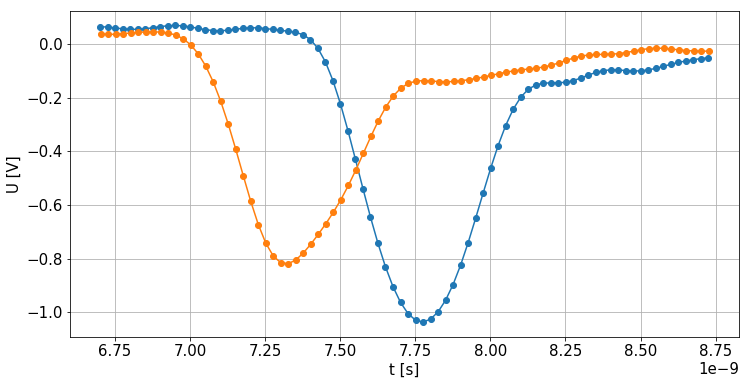

showRawPulse done


In [3]:
M18_02 = analyseMeasurement(rawdataFolder, campaignId, measurementId, signalAmplitude, diagnose = True)

M18_02.read()

M18_02.showRawPulse(pulseNr = 0, style="o-")

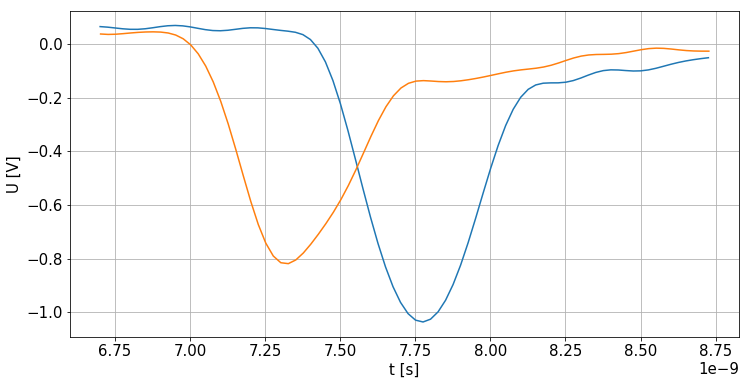

showRawPulse done


In [4]:
M18_02.showRawPulse(pulseNr = 0, style="-")

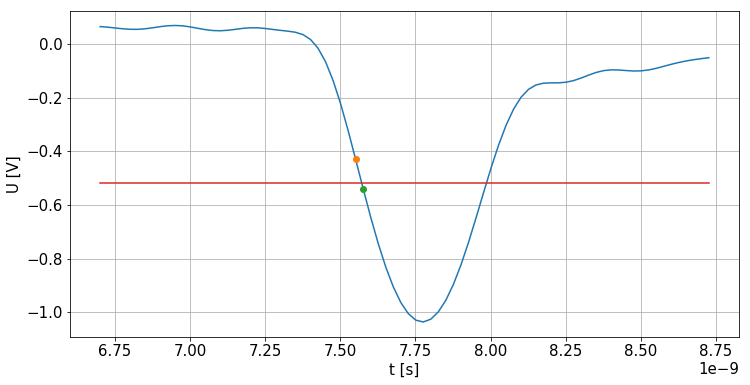

xt: 7.571202442552583e-09 ps, yt -0.518048471531074 ps


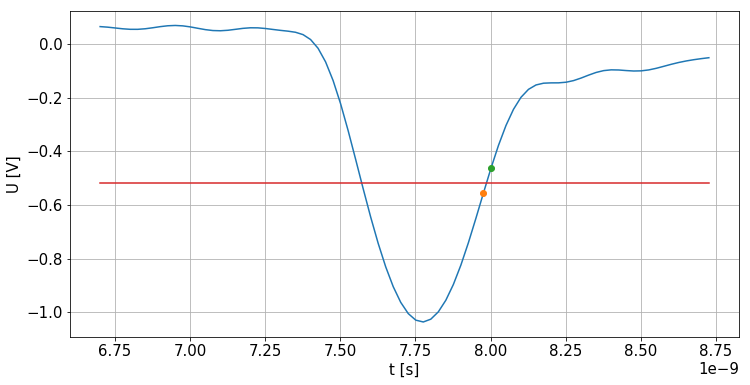

xt: 7.986206771686237e-09 ps, yt -0.518048471531074 ps


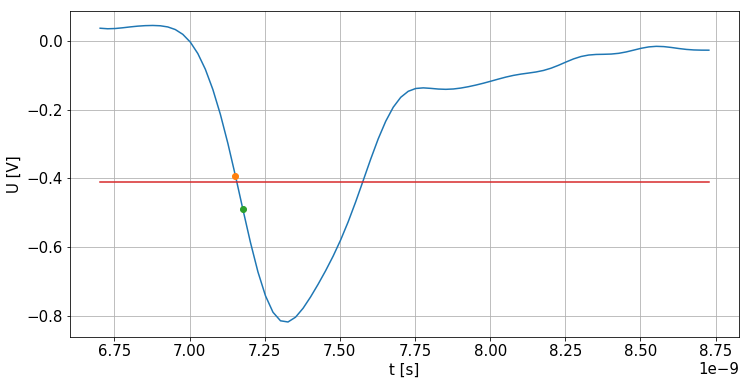

xt: 7.156857448495527e-09 ps, yt -0.4093086105422117 ps


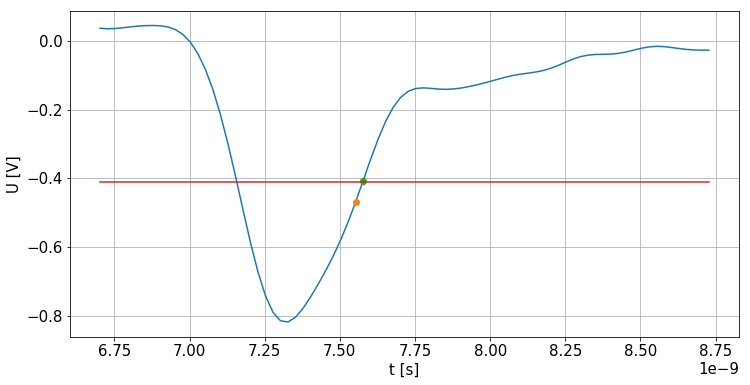

xt: 7.57642871843299e-09 ps, yt -0.4093086105422117 ps
calculateDelta done
calculateDelta done
calculateDelta done


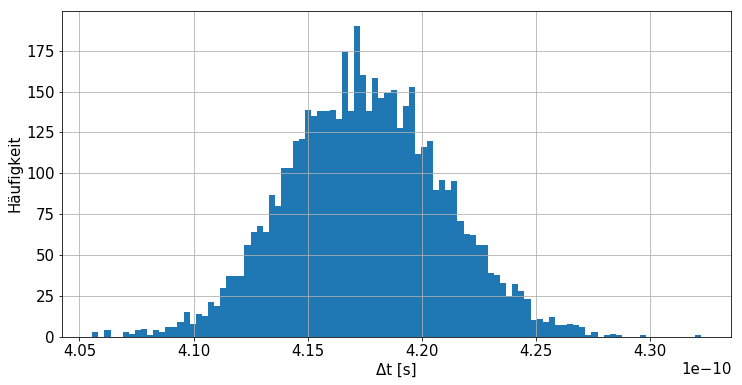

histogram done


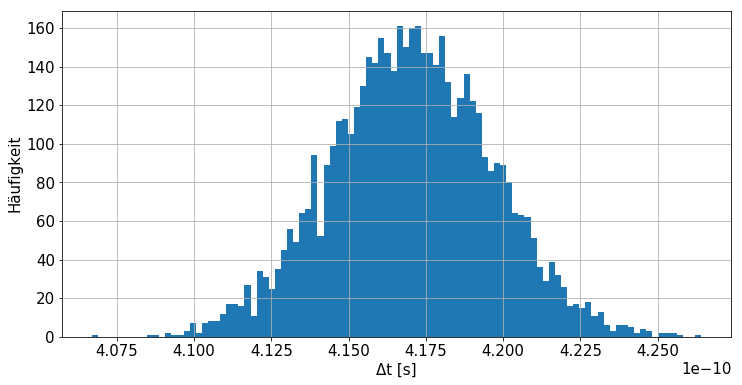

histogram done


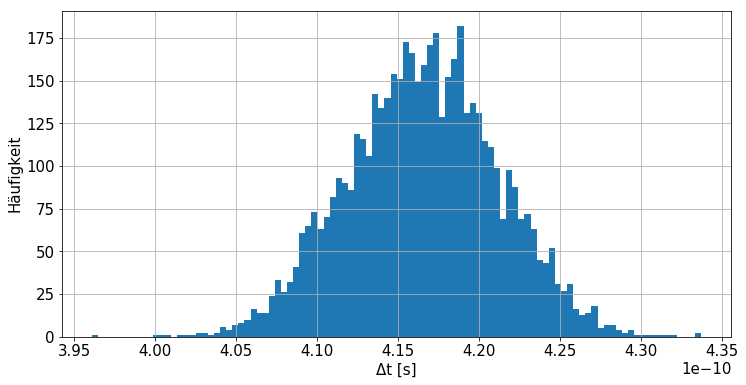

histogram done
43


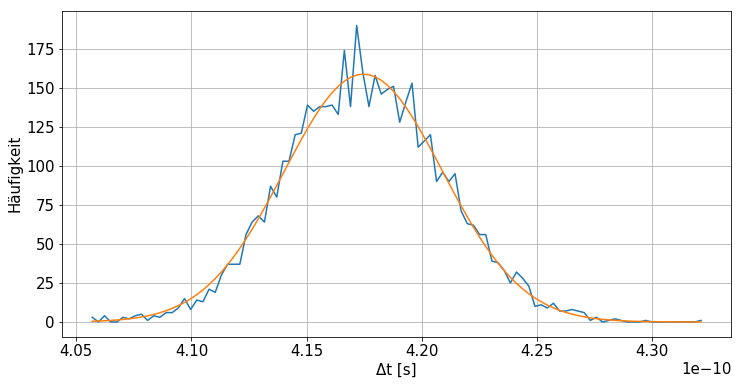

parameter: [1.37076944e-09 4.17459939e-10 3.44348874e-12] [A, mu, sigma]
fitHist done
50


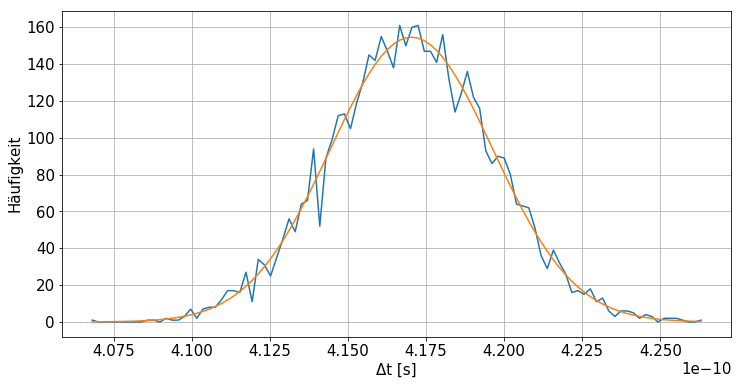

parameter: [1.00910631e-09 4.17033341e-10 2.60327311e-12] [A, mu, sigma]
fitHist done
60


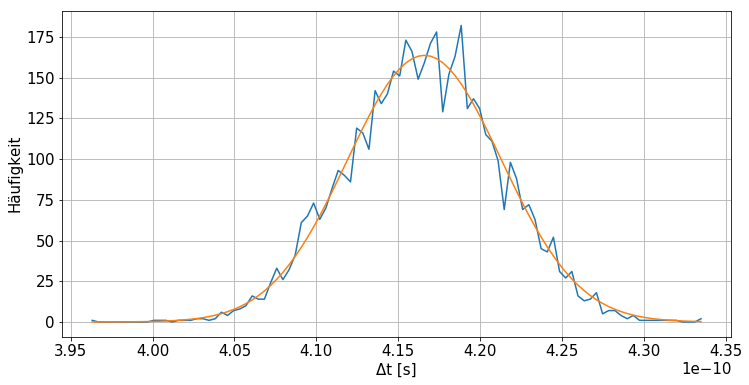

parameter: [1.93383981e-09 4.16606101e-10 4.71394884e-12] [A, mu, sigma]
fitHist done


In [11]:
absolute = False
threshold = 0.5

if(absolute):
    s = "Abs"
else:
    s = "Rel"
name = "thres{:d}".format(int(threshold * 100)) + s
 
M18_02.threshold(absolute = absolute, threshold = threshold)

M18_02.calculateDelta(name + "F", M18_02.data["thres"][name][0,0,:,0], M18_02.data["thres"][name][1,0,:,0])
M18_02.calculateDelta(name + "C", M18_02.data["thres"][name][0,1,:,0], M18_02.data["thres"][name][1,1,:,0])
M18_02.calculateDelta(name + "R", M18_02.data["thres"][name][0,2,:,0], M18_02.data["thres"][name][1,2,:,0])

M18_02.histogram(name + "F", name + "F")
M18_02.histogram(name + "C", name + "C")
M18_02.histogram(name + "R", name + "R")

M18_02.fitHist(name + "F", name + "F")
M18_02.fitHist(name + "C", name + "C")
M18_02.fitHist(name + "R", name + "R")

In [12]:
M18_02.showResult(name + "F")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "C")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "R")

σ_0: 3.4434887438770856 ps
σ_1: 2.434914241735034 ps
σ_1 = σ_0 / sqrt(2)

μ: 417.4599390113976 ps

coma separated [σ_0, σ_1, μ]
3.4434887438770855e-12,2.4349142417350337e-12,4.174599390113976e-10

 tab separated [σ_0, σ_1, μ]
3.4434887438770855e-12	2.4349142417350337e-12	4.174599390113976e-10
---------------------------------------------------------------------------------------
σ_0: 2.6032731126756663 ps
σ_1: 1.8407920712535748 ps
σ_1 = σ_0 / sqrt(2)

μ: 417.03334129100267 ps

coma separated [σ_0, σ_1, μ]
2.6032731126756663e-12,1.840792071253575e-12,4.1703334129100265e-10

 tab separated [σ_0, σ_1, μ]
2.6032731126756663e-12	1.840792071253575e-12	4.1703334129100265e-10
---------------------------------------------------------------------------------------
σ_0: 4.713948842658939 ps
σ_1: 3.333265192810613 ps
σ_1 = σ_0 / sqrt(2)

μ: 416.6061012555142 ps

coma separated [σ_0, σ_1, μ]
4.713948842658939e-12,3.333265192810613e-12,4.166061012555142e-10

 tab separated [σ_0, σ_1, μ]
4.713948842

iPeak: 43 iLeft: 31 iRight: 56


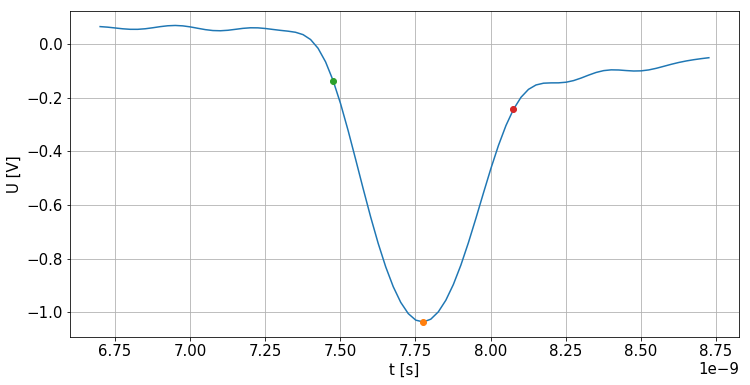

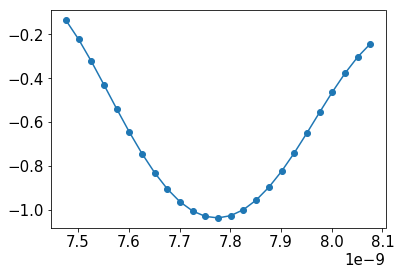

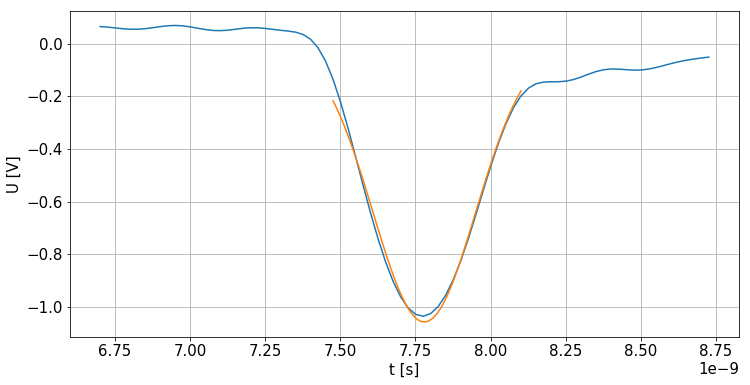

parameter: [-4.52346117e-10  7.77950758e-09  1.70562478e-10] [A, mu, sigma]
iPeak: 25 iLeft: 15 iRight: 40


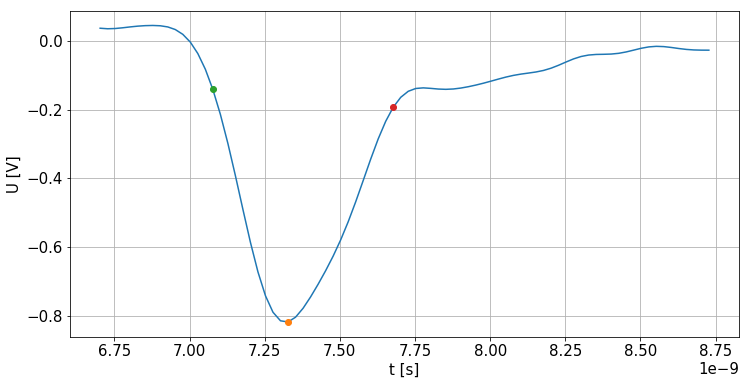

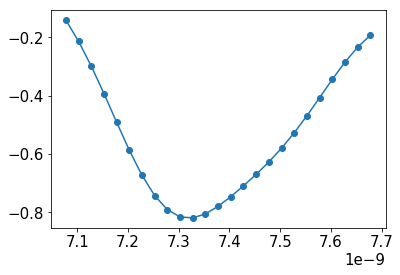

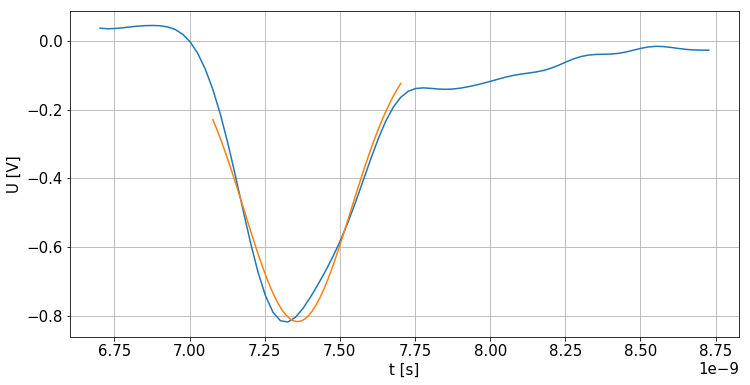

parameter: [-3.61825631e-10  7.35920892e-09  1.76543265e-10] [A, mu, sigma]


C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


fitGauss done
calculateDelta done


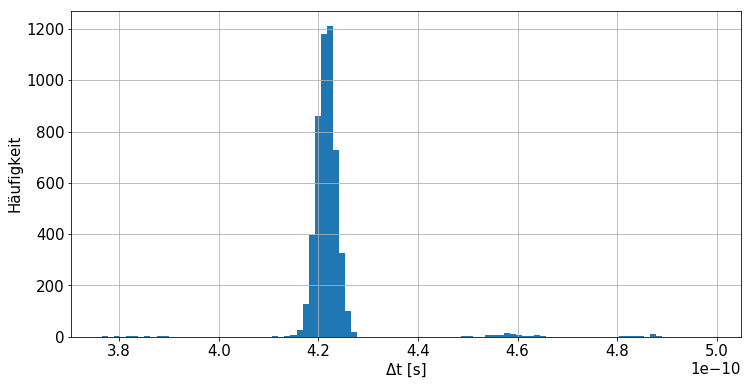

histogram done
37


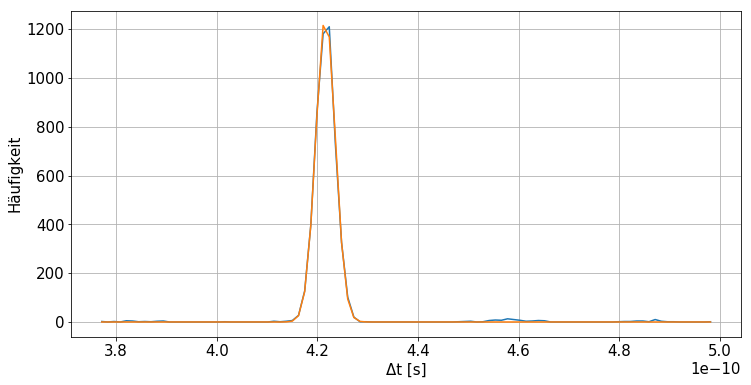

parameter: [6.08559546e-09 4.21621054e-10 1.93290770e-12] [A, mu, sigma]
fitHist done


In [7]:
M18_02.fitGauss(threshold = 0.2, diagnosePulse=0)

M18_02.calculateDelta("gauss", M18_02.data["gauss"][0,:,1], M18_02.data["gauss"][1,:,1])

M18_02.histogram("gauss", "gauss")

M18_02.fitHist("gauss", "gauss")

In [8]:
M18_02.showResult("gauss")

σ_0: 1.9329077005925221 ps
σ_1: 1.3667721424966692 ps
σ_1 = σ_0 / sqrt(2)

μ: 421.6210541108015 ps

coma separated [σ_0, σ_1, μ]
1.9329077005925222e-12,1.3667721424966692e-12,4.216210541108015e-10

 tab separated [σ_0, σ_1, μ]
1.9329077005925222e-12	1.3667721424966692e-12	4.216210541108015e-10


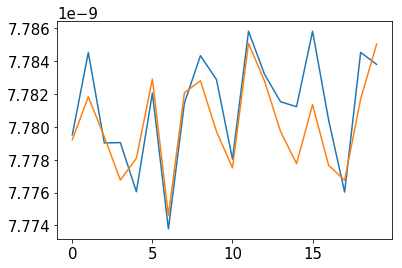

In [10]:
plt.plot(M18_02.data["gauss"][0,:,1][:20])
plt.plot(M18_02.data["gauss"][1,:,1][0:20] + 0.42e-9)

In [ ]:
plt.plot(M18_02.data["gauss"][0,:,1] - M18_02.data["gauss"][1,:,1])

In [ ]:
%load_ext autoreload

In [ ]:
exportedDict = M18_02.exportDict()
%autoreload
M18_02 = analyseMeasurement(diagnose = True)
M18_02.importDict(exportedDict)